# TEST OF DIFFERENT LOGIT MODEL CALIBRATIONS

This document could potentially be used to test whichever logit calibration

## 1. Import libraries and download files

In [70]:
# libraries to import
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from ast import literal_eval
from typing import Dict
import biogeme
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
print(os.getcwd())
os.chdir(r"C:\Users\LMENENDEZ\GitHub\MultiModX")
print(os.getcwd())
pd.set_option('display.max_columns', None)

C:\Users\LMENENDEZ\GitHub\MultiModX
C:\Users\LMENENDEZ\GitHub\MultiModX


In [19]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
%autoreload
from strategic_evaluator.logit_model import *
from script.trips_format import *

In [21]:
trips_logit=pd.read_csv(r"C:\Users\LMENENDEZ\GitHub\MultiModX\trips_logit_CS10.csv")

In [22]:
trips_logit_old=pd.read_csv(r"C:\Users\LMENENDEZ\GitHub\MultiModX\trips_logit.csv")

In [23]:
#import the file necessary to calibrate the logit model 
trips_logit_old.head()

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,total_travel_time,total_cost,total_emissions
0,ES111,ES112,"['007131412', '007120300']",58.504,45.967302,0.895619,1.064722,4.659657,2.642030,3.274670,1.0,43.0,74.0,179.500000,10.89,3.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296.500000,10.89,3.41
1,ES111,ES113,"['007131400', '007122100']",831.820,638.068954,17.071497,16.351680,68.127097,37.168519,55.032253,1.0,61.0,28.0,42.733333,7.40,2.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.733333,7.40,2.32
2,ES111,ES113,"['007131412', '007120300']",5.003,3.764162,0.087354,0.135002,0.524124,0.190590,0.301768,1.0,43.0,69.0,179.500000,10.89,3.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291.500000,10.89,3.41
3,ES111,ES113,"['007131412', '007122100']",298.436,228.508198,6.682714,5.530960,23.093871,14.035849,20.584408,1.0,43.0,28.0,78.571429,11.09,3.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.571429,11.09,3.47
4,ES111,ES114,"['007131400', '007122100']",19.007,14.148943,0.596662,0.475672,1.545168,0.858479,1.382076,1.0,61.0,90.0,42.733333,7.40,2.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.733333,7.40,2.32


In [24]:
trips_logit=trips_logit_format(trips_logit)

In [46]:
trips_logit_improved=trips_logit_format(trips_logit,drop_single_paths=True)

no need to calculate probabilities for archetype_0
no need to calculate probabilities for archetype_1
no need to calculate probabilities for archetype_2
no need to calculate probabilities for archetype_3
no need to calculate probabilities for archetype_4
no need to calculate probabilities for archetype_5


In [47]:
trips_logit_improved.head()

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
0,ES111,ES113,"['007131400', '007122100']",831.820,638.068954,17.071497,16.351680,68.127097,37.168519,55.032253,1.0,61.0,28.0,42.733333,7.40,2.32,NaN,NaN,NaN,NaN,131.733333,7.40,2.32,1,1135.259,870.341315,0.733125,23.841565,0.716039,22.017641,0.742663,91.745092,0.742569,51.394958,0.723194,75.91843,0.724887
1,ES111,ES113,"['007131412', '007122100']",298.436,228.508198,6.682714,5.530960,23.093871,14.035849,20.584408,1.0,43.0,28.0,78.571429,11.09,3.47,NaN,NaN,NaN,NaN,149.571429,11.09,3.47,2,1135.259,870.341315,0.262550,23.841565,0.280297,22.017641,0.251206,91.745092,0.251718,51.394958,0.273098,75.91843,0.271138
2,ES111,ES113,"['007131412', '007120300']",5.003,3.764162,0.087354,0.135002,0.524124,0.190590,0.301768,1.0,43.0,69.0,179.500000,10.89,3.41,NaN,NaN,NaN,NaN,291.500000,10.89,3.41,3,1135.259,870.341315,0.004325,23.841565,0.003664,22.017641,0.006132,91.745092,0.005713,51.394958,0.003708,75.91843,0.003975
3,ES111,ES114,"['007131412', '007123004']",470.356,331.036817,15.922206,12.295786,51.267123,22.336955,37.497113,1.0,43.0,31.0,77.266667,9.74,3.05,NaN,NaN,NaN,NaN,151.266667,9.74,3.05,1,742.468,524.662658,0.630952,24.544201,0.648716,19.613536,0.626903,78.447439,0.653522,36.069526,0.619275,59.13064,0.634140
4,ES111,ES114,"['007131400', '007123004']",250.284,178.501300,7.842317,6.669803,24.916093,12.508677,19.845810,1.0,61.0,31.0,46.947368,4.67,1.46,NaN,NaN,NaN,NaN,138.947368,4.67,1.46,2,742.468,524.662658,0.340221,24.544201,0.319518,19.613536,0.340061,78.447439,0.317615,36.069526,0.346793,59.13064,0.335626


In [25]:
trips_logit_old=trips_logit_format(trips_logit_old)

In [26]:
trips_logit.head()

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
0,ES111,ES112,"['007131412', '007120300']",58.504,45.967302,0.895619,1.064722,4.659657,2.642030,3.274670,1.0,43.0,74.0,179.500000,10.89,3.41,NaN,NaN,NaN,NaN,296.500000,10.89,3.41,1,58.504,45.967302,1.000000,0.895619,1.000000,1.064722,1.000000,4.659657,1.000000,2.642030,1.000000,3.27467,1.000000
1,ES111,ES113,"['007131400', '007122100']",831.820,638.068954,17.071497,16.351680,68.127097,37.168519,55.032253,1.0,61.0,28.0,42.733333,7.40,2.32,NaN,NaN,NaN,NaN,131.733333,7.40,2.32,1,1135.259,870.341315,0.733125,23.841565,0.716039,22.017641,0.742663,91.745092,0.742569,51.394958,0.723194,75.91843,0.724887
3,ES111,ES113,"['007131412', '007122100']",298.436,228.508198,6.682714,5.530960,23.093871,14.035849,20.584408,1.0,43.0,28.0,78.571429,11.09,3.47,NaN,NaN,NaN,NaN,149.571429,11.09,3.47,2,1135.259,870.341315,0.262550,23.841565,0.280297,22.017641,0.251206,91.745092,0.251718,51.394958,0.273098,75.91843,0.271138
2,ES111,ES113,"['007131412', '007120300']",5.003,3.764162,0.087354,0.135002,0.524124,0.190590,0.301768,1.0,43.0,69.0,179.500000,10.89,3.41,NaN,NaN,NaN,NaN,291.500000,10.89,3.41,3,1135.259,870.341315,0.004325,23.841565,0.003664,22.017641,0.006132,91.745092,0.005713,51.394958,0.003708,75.91843,0.003975
8,ES111,ES114,"['007131412', '007123004']",470.356,331.036817,15.922206,12.295786,51.267123,22.336955,37.497113,1.0,43.0,31.0,77.266667,9.74,3.05,NaN,NaN,NaN,NaN,151.266667,9.74,3.05,1,770.474,524.662658,0.630952,24.544201,0.648716,19.613536,0.626903,78.447439,0.653522,36.069526,0.619275,59.13064,0.634140


In [27]:
trips_logit_old.head()

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
0,ES111,ES112,"['007131412', '007120300']",58.504,45.967302,0.895619,1.064722,4.659657,2.642030,3.274670,1.0,43.0,74.0,179.500000,10.89,3.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296.500000,10.89,3.41,1,58.504,45.967302,1.000000,0.895619,1.000000,1.064722,1.000000,4.659657,1.000000,2.642030,1.000000,3.27467,1.000000
1,ES111,ES113,"['007131400', '007122100']",831.820,638.068954,17.071497,16.351680,68.127097,37.168519,55.032253,1.0,61.0,28.0,42.733333,7.40,2.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.733333,7.40,2.32,1,1135.259,870.341315,0.733125,23.841565,0.716039,22.017641,0.742663,91.745092,0.742569,51.394958,0.723194,75.91843,0.724887
3,ES111,ES113,"['007131412', '007122100']",298.436,228.508198,6.682714,5.530960,23.093871,14.035849,20.584408,1.0,43.0,28.0,78.571429,11.09,3.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.571429,11.09,3.47,2,1135.259,870.341315,0.262550,23.841565,0.280297,22.017641,0.251206,91.745092,0.251718,51.394958,0.273098,75.91843,0.271138
2,ES111,ES113,"['007131412', '007120300']",5.003,3.764162,0.087354,0.135002,0.524124,0.190590,0.301768,1.0,43.0,69.0,179.500000,10.89,3.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291.500000,10.89,3.41,3,1135.259,870.341315,0.004325,23.841565,0.003664,22.017641,0.006132,91.745092,0.005713,51.394958,0.003708,75.91843,0.003975
8,ES111,ES114,"['007131412', '007123004']",470.356,331.036817,15.922206,12.295786,51.267123,22.336955,37.497113,1.0,43.0,31.0,77.266667,9.74,3.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.266667,9.74,3.05,1,770.474,524.662658,0.630952,24.544201,0.648716,19.613536,0.626903,78.447439,0.653522,36.069526,0.619275,59.13064,0.634140


In [29]:
paths_w_costs=generate_paths_w_costs(trips_logit)

In [30]:
paths_w_costs[paths_w_costs.isna().any(axis=1)]

,origin,destination,travel_time_1,cost_1,emissions_1,train_1,plane_1,multimodal_1,av_1,travel_time_2,cost_2,emissions_2,train_2,plane_2,multimodal_2,av_2,travel_time_3,cost_3,emissions_3,train_3,plane_3,multimodal_3,av_3


In [31]:
paths_w_costs.head()

,origin,destination,travel_time_1,cost_1,emissions_1,train_1,plane_1,multimodal_1,av_1,travel_time_2,cost_2,emissions_2,train_2,plane_2,multimodal_2,av_2,travel_time_3,cost_3,emissions_3,train_3,plane_3,multimodal_3,av_3
0,ES111,ES112,296.500000,10.890,3.41,1,0,0,1,-1.000000,-1.000,-1.00,0,0,0,0,-1.000,-1.00,-1.00,0,0,0,0
1,ES111,ES113,131.733333,7.400,2.32,1,0,0,1,149.571429,11.090,3.47,1,0,0,1,291.500,10.89,3.41,1,0,0,1
8,ES111,ES114,151.266667,9.740,3.05,1,0,0,1,138.947368,4.670,1.46,1,0,0,1,174.375,6.05,1.89,1,0,0,1
10,ES111,ES130,317.000000,143.284,69.96,0,1,0,1,289.000000,138.479,42.06,0,1,0,1,-1.000,-1.00,-1.00,0,0,0,0
12,ES111,ES211,293.000000,143.284,69.96,0,1,0,1,265.000000,138.479,42.06,0,1,0,1,-1.000,-1.00,-1.00,0,0,0,0


In [32]:
calibration_matrix=generate_calibration_matrix(trips_logit,paths_w_costs)

In [48]:
calibration_matrix_improved=generate_calibration_matrix(trips_logit_improved,paths_w_costs,drop_single_paths=True)

In [49]:
calibration_matrix_improved.head()

,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,total_travel_time,observed_choice,travel_time_1,cost_1,emissions_1,train_1,plane_1,multimodal_1,av_1,travel_time_2,cost_2,emissions_2,train_2,plane_2,multimodal_2,av_2,travel_time_3,cost_3,emissions_3,train_3,plane_3,multimodal_3,av_3
0,831.820,638.068954,17.071497,16.351680,68.127097,37.168519,55.032253,131.733333,1,131.733333,7.40,2.32,1,0,0,1,149.571429,11.09,3.47,1,0,0,1,291.500,10.89,3.41,1,0,0,1
1,298.436,228.508198,6.682714,5.530960,23.093871,14.035849,20.584408,149.571429,2,131.733333,7.40,2.32,1,0,0,1,149.571429,11.09,3.47,1,0,0,1,291.500,10.89,3.41,1,0,0,1
2,5.003,3.764162,0.087354,0.135002,0.524124,0.190590,0.301768,291.500000,3,131.733333,7.40,2.32,1,0,0,1,149.571429,11.09,3.47,1,0,0,1,291.500,10.89,3.41,1,0,0,1
3,470.356,331.036817,15.922206,12.295786,51.267123,22.336955,37.497113,151.266667,1,151.266667,9.74,3.05,1,0,0,1,138.947368,4.67,1.46,1,0,0,1,174.375,6.05,1.89,1,0,0,1
4,250.284,178.501300,7.842317,6.669803,24.916093,12.508677,19.845810,138.947368,2,151.266667,9.74,3.05,1,0,0,1,138.947368,4.67,1.46,1,0,0,1,174.375,6.05,1.89,1,0,0,1


In [35]:
calibration_matrix_improved[calibration_matrix_improved.isna().any(axis=1)]

,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,total_travel_time,observed_choice,travel_time_1,cost_1,emissions_1,train_1,plane_1,multimodal_1,av_1,travel_time_2,cost_2,emissions_2,train_2,plane_2,multimodal_2,av_2,travel_time_3,cost_3,emissions_3,train_3,plane_3,multimodal_3,av_3


In [36]:
calibration_matrix[calibration_matrix.isna().any(axis=1)]

,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,total_travel_time,observed_choice,travel_time_1,cost_1,emissions_1,train_1,plane_1,multimodal_1,av_1,travel_time_2,cost_2,emissions_2,train_2,plane_2,multimodal_2,av_2,travel_time_3,cost_3,emissions_3,train_3,plane_3,multimodal_3,av_3


In [37]:
calibration_matrix.to_csv("calibration_matrix_CS10.csv",index=False)

In [50]:
calibration_matrix_improved.to_csv("calibration_matrix_improved_CS10.csv",index=False)

In [51]:
calibration_matrix["observed_choice"].value_counts()

observed_choice
1    1493
2     664
3     281
Name: count, dtype: int64

In [52]:
trips_logit["noption"].value_counts()

noption
1    1493
2     664
3     281
Name: count, dtype: int64

In [53]:
calibration_matrix_improved["observed_choice"].value_counts()

observed_choice
1    664
2    664
3    281
Name: count, dtype: int64

In [55]:
trips_logit_improved["noption"].value_counts()

noption
1    664
2    664
3    281
Name: count, dtype: int64

## 2. Download calibration results of generate new calibration results

Let us compare more thorougbly the normal calibration and the calibration without the rows with one single option

Frist we calibrate eliminating the single option O-D pairs

In [71]:
# Delete pickle files if they already exist for archetypes 0 to 5
for k in range(6):
    pickle_file = f"archetype_{k}.pickle"
    if os.path.exists(pickle_file):
        os.remove(pickle_file)
        print(f"Deleted {pickle_file}")
    else:
        print(f"{pickle_file} does not exist.")

Deleted archetype_0.pickle
Deleted archetype_1.pickle
Deleted archetype_2.pickle
Deleted archetype_3.pickle
Deleted archetype_4.pickle
Deleted archetype_5.pickle


In [42]:
# test without fixed parameters
database_path = r"C:\Users\LMENENDEZ\GitHub\MultiModX\calibration_matrix_CS10.csv"
n_archetypes = 6
n_alternatives = 3
test=calibrate_main(database_path, n_archetypes, n_alternatives)

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...


Training results:
Results for model archetype_0
Nbr of parameters:		5
Sample size:			1950
Excluded data:			0
Final log likelihood:		-1140.463
Akaike Information Criterion:	2290.927
Bayesian Information Criterion:	2318.805

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE -0.131356      1.268850    -0.103524      0.917547
ASC_TRAIN -0.091121      1.297526    -0.070227      0.944013
B_CO2     -0.031994      0.011798    -2.711762      0.006693
B_COST     0.000971      0.005934     0.163568      0.870071
B_TIME    -0.018995      0.001370   -13.859713      0.000000
{'ASC_PLANE': np.float64(-0.13135579501763903), 'ASC_TRAIN': np.float64(-0.09112116030156221), 'B_CO2': np.float64(-0.031994282864653785), 'B_COST': np.float64(0.0009705475725185267), 'B_TIME': np.float64(-0.018994664360340828)}
Test results:
{'ASC_PLANE': np.float64(-0.13135579501763903), 'ASC_TRAIN': np.float64(-0.09112116030156221), 'B_CO2': np.float64(-0.031994282864653785), 'B_COST': np.float64(0.000970

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]

Training results:
Results for model archetype_1
Nbr of parameters:		5
Sample size:			1950
Excluded data:			0
Final log likelihood:		-947.817
Akaike Information Criterion:	1905.634
Bayesian Information Criterion:	1933.512

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  1.502951      1.381752     1.087714      0.276721
ASC_TRAIN  1.141712      1.404663     0.812801      0.416332
B_CO2     -0.027743      0.011819    -2.347302      0.018910
B_COST    -0.005966      0.006089    -0.979798      0.327186
B_TIME    -0.016113      0.001227   -13.128717      0.000000
{'ASC_PLANE': np.float64(1.5029514265648871), 'ASC_TRAIN': np.float64(1.1417116776069394), 'B_CO2': np.float64(-0.02774320815895456), 'B_COST': np.float64(-0.005966383669181249), 'B_TIME': np.float64(-0.01611286850280101)}
Test results:
{'ASC_PLANE': np.float64(1.5029514265648871), 'ASC_TRAIN': np.float64(1.1417116776069394), 'B_CO2': np.float64(-0.02774320815895456), 'B_COST': np.float64(-0.00596638366918124

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...


Training results:
Results for model archetype_2
Nbr of parameters:		5
Sample size:			1950
Excluded data:			0
Final log likelihood:		-1050.862
Akaike Information Criterion:	2111.725
Bayesian Information Criterion:	2139.603

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  1.451353      2.197822     0.660359      0.509023
ASC_TRAIN  1.300655      2.209563     0.588648      0.556097
B_CO2     -0.028234      0.011698    -2.413523      0.015799
B_COST    -0.003818      0.005905    -0.646675      0.517842
B_TIME    -0.016970      0.001231   -13.784363      0.000000
{'ASC_PLANE': np.float64(1.4513525641652436), 'ASC_TRAIN': np.float64(1.3006550482203643), 'B_CO2': np.float64(-0.028233532530591927), 'B_COST': np.float64(-0.0038183773102942694), 'B_TIME': np.float64(-0.01697008664423167)}
Test results:
{'ASC_PLANE': np.float64(1.4513525641652436), 'ASC_TRAIN': np.float64(1.3006550482203643), 'B_CO2': np.float64(-0.028233532530591927), 'B_COST': np.float64(-0.0038183773102

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...


Training results:
Results for model archetype_3
Nbr of parameters:		5
Sample size:			1950
Excluded data:			0
Final log likelihood:		-992.4395
Akaike Information Criterion:	1994.879
Bayesian Information Criterion:	2022.757

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  0.152930      0.896913     0.170507      0.864611
ASC_TRAIN -0.231118      0.926580    -0.249431      0.803027
B_CO2     -0.021961      0.010355    -2.120756      0.033942
B_COST    -0.007191      0.005243    -1.371432      0.170240
B_TIME    -0.014738      0.001138   -12.949993      0.000000
{'ASC_PLANE': np.float64(0.15293009975778998), 'ASC_TRAIN': np.float64(-0.2311183208544101), 'B_CO2': np.float64(-0.02196123261062276), 'B_COST': np.float64(-0.007190831303655813), 'B_TIME': np.float64(-0.014737917914630572)}
Test results:
{'ASC_PLANE': np.float64(0.15293009975778998), 'ASC_TRAIN': np.float64(-0.2311183208544101), 'B_CO2': np.float64(-0.02196123261062276), 'B_COST': np.float64(-0.00719083130

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...


Training results:
Results for model archetype_4
Nbr of parameters:		5
Sample size:			1950
Excluded data:			0
Final log likelihood:		-1140.277
Akaike Information Criterion:	2290.553
Bayesian Information Criterion:	2318.431

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  1.069462      1.773148     0.603143      0.546414
ASC_TRAIN  0.904409      1.787339     0.506009      0.612851
B_CO2     -0.030123      0.010035    -3.001665      0.002685
B_COST    -0.002238      0.004799    -0.466375      0.640947
B_TIME    -0.015800      0.001135   -13.920758      0.000000
{'ASC_PLANE': np.float64(1.069461772737972), 'ASC_TRAIN': np.float64(0.9044088686134854), 'B_CO2': np.float64(-0.030122680400487347), 'B_COST': np.float64(-0.0022380726574633006), 'B_TIME': np.float64(-0.01579961001899317)}
Test results:
{'ASC_PLANE': np.float64(1.069461772737972), 'ASC_TRAIN': np.float64(0.9044088686134854), 'B_CO2': np.float64(-0.030122680400487347), 'B_COST': np.float64(-0.002238072657463

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...


Training results:
Results for model archetype_5
Nbr of parameters:		5
Sample size:			1950
Excluded data:			0
Final log likelihood:		-1127.965
Akaike Information Criterion:	2265.93
Bayesian Information Criterion:	2293.808

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  0.811330      1.312618     0.618100      0.536509
ASC_TRAIN  0.588320      1.335493     0.440527      0.659556
B_CO2     -0.023190      0.011255    -2.060320      0.039368
B_COST    -0.005496      0.005628    -0.976522      0.328806
B_TIME    -0.015891      0.001199   -13.258187      0.000000
{'ASC_PLANE': np.float64(0.8113300183670434), 'ASC_TRAIN': np.float64(0.5883200854644589), 'B_CO2': np.float64(-0.02318977929313741), 'B_COST': np.float64(-0.005495812146651515), 'B_TIME': np.float64(-0.015891231968398197)}
Test results:
{'ASC_PLANE': np.float64(0.8113300183670434), 'ASC_TRAIN': np.float64(0.5883200854644589), 'B_CO2': np.float64(-0.02318977929313741), 'B_COST': np.float64(-0.0054958121466515

In [ ]:
# Delete pickle files if they already exist for archetypes 0 to 5
for k in range(6):
    pickle_file = f"archetype_{k}.pickle"
    if os.path.exists(pickle_file):
        os.remove(pickle_file)
        print(f"Deleted {pickle_file}")
    else:
        print(f"{pickle_file} does not exist.")

In [ ]:
calibration_matrix_improved[calibration_matrix_improved.isna().any(axis=1)]

In [57]:
database_path = r"C:\Users\LMENENDEZ\GitHub\MultiModX\calibration_matrix_improved_CS10.csv"
n_archetypes = 6
n_alternatives = 3
test_improved=calibrate_main(database_path, n_archetypes, n_alternatives)

The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 1[3.0]-2[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-11[3.0]-13[3.0]-14[3.0]-19[3.0]-21[3.0]-23[3.0]-30[3.0]-31...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 1[3.0]-2[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-11[3.0]-13[3.0]-14[3.0]-19[3.0]-21[3.0]-23[3.0]-30[3.0]-31...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 1[3.0]-2[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-11[3.0]-13[3.0]-14[3.0]-19[3.0]-21[3.0]-23[3.0]-30[3.0]-31...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 1[3.0]-2[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-11[3.0]-13[3.0]-14[3.0]-19[3.0]-21[3.0]-23[3.0]-30[3.0]-31...


Training results:
Results for model archetype_0
Nbr of parameters:		5
Sample size:			1287
Excluded data:			0
Final log likelihood:		-901.0866
Akaike Information Criterion:	1812.173
Bayesian Information Criterion:	1837.973

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE -0.799926      1.409407    -0.567562      0.570333
ASC_TRAIN -0.721394      1.448076    -0.498174      0.618361
B_CO2     -0.025053      0.013474    -1.859335      0.062980
B_COST    -0.000666      0.006897    -0.096502      0.923122
B_TIME    -0.020100      0.001574   -12.772294      0.000000
{'ASC_PLANE': np.float64(-0.7999257918701681), 'ASC_TRAIN': np.float64(-0.7213938449406241), 'B_CO2': np.float64(-0.025052736517727256), 'B_COST': np.float64(-0.0006655541411188761), 'B_TIME': np.float64(-0.020099714962050753)}
Test results:
{'ASC_PLANE': np.float64(-0.7999257918701681), 'ASC_TRAIN': np.float64(-0.7213938449406241), 'B_CO2': np.float64(-0.025052736517727256), 'B_COST': np.float64(-0.00066555

The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 1[3.0]-2[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-11[3.0]-13[3.0]-14[3.0]-19[3.0]-21[3.0]-23[3.0]-30[3.0]-31...


Training results:
Results for model archetype_1
Nbr of parameters:		5
Sample size:			1287
Excluded data:			0
Final log likelihood:		-827.9747
Akaike Information Criterion:	1665.949
Bayesian Information Criterion:	1691.75

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE -0.215350      1.077282    -0.199902      0.841558
ASC_TRAIN -0.563322      1.109032    -0.507940      0.611495
B_CO2     -0.019633      0.012117    -1.620283      0.105172
B_COST    -0.007603      0.006209    -1.224529      0.220753
B_TIME    -0.016568      0.001300   -12.743548      0.000000
{'ASC_PLANE': np.float64(-0.21535035384695364), 'ASC_TRAIN': np.float64(-0.5633220785747075), 'B_CO2': np.float64(-0.019633126756662483), 'B_COST': np.float64(-0.0076027544234941935), 'B_TIME': np.float64(-0.01656791831376502)}
Test results:
{'ASC_PLANE': np.float64(-0.21535035384695364), 'ASC_TRAIN': np.float64(-0.5633220785747075), 'B_CO2': np.float64(-0.019633126756662483), 'B_COST': np.float64(-0.00760275

The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 1[3.0]-2[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-11[3.0]-13[3.0]-14[3.0]-19[3.0]-21[3.0]-23[3.0]-30[3.0]-31...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 1[3.0]-2[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-11[3.0]-13[3.0]-14[3.0]-19[3.0]-21[3.0]-23[3.0]-30[3.0]-31...


Training results:
Results for model archetype_2
Nbr of parameters:		5
Sample size:			1287
Excluded data:			0
Final log likelihood:		-871.9469
Akaike Information Criterion:	1753.894
Bayesian Information Criterion:	1779.694

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  0.073554      1.714401     0.042903      0.965778
ASC_TRAIN -0.129784      1.734126    -0.074841      0.940341
B_CO2     -0.022342      0.012737    -1.754123      0.079410
B_COST    -0.005441      0.006403    -0.849769      0.395453
B_TIME    -0.017102      0.001318   -12.979485      0.000000
{'ASC_PLANE': np.float64(0.07355375507673938), 'ASC_TRAIN': np.float64(-0.12978356153209372), 'B_CO2': np.float64(-0.022341632827997643), 'B_COST': np.float64(-0.005441072330583882), 'B_TIME': np.float64(-0.01710169029139258)}
Test results:
{'ASC_PLANE': np.float64(0.07355375507673938), 'ASC_TRAIN': np.float64(-0.12978356153209372), 'B_CO2': np.float64(-0.022341632827997643), 'B_COST': np.float64(-0.00544107

The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 1[3.0]-2[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-11[3.0]-13[3.0]-14[3.0]-19[3.0]-21[3.0]-23[3.0]-30[3.0]-31...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 1[3.0]-2[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-11[3.0]-13[3.0]-14[3.0]-19[3.0]-21[3.0]-23[3.0]-30[3.0]-31...


Training results:
Results for model archetype_3
Nbr of parameters:		5
Sample size:			1287
Excluded data:			0
Final log likelihood:		-845.0905
Akaike Information Criterion:	1700.181
Bayesian Information Criterion:	1725.981

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE -0.955819      0.900220    -1.061762      0.288344
ASC_TRAIN -1.374162      0.938002    -1.464989      0.142924
B_CO2     -0.013977      0.011388    -1.227417      0.219666
B_COST    -0.009679      0.005895    -1.641973      0.100596
B_TIME    -0.016259      0.001268   -12.819168      0.000000
{'ASC_PLANE': np.float64(-0.9558193475247745), 'ASC_TRAIN': np.float64(-1.374162279519325), 'B_CO2': np.float64(-0.013977364355844875), 'B_COST': np.float64(-0.009678846231555668), 'B_TIME': np.float64(-0.01625926794877378)}
Test results:
{'ASC_PLANE': np.float64(-0.9558193475247745), 'ASC_TRAIN': np.float64(-1.374162279519325), 'B_CO2': np.float64(-0.013977364355844875), 'B_COST': np.float64(-0.009678846231

The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 1[3.0]-2[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-11[3.0]-13[3.0]-14[3.0]-19[3.0]-21[3.0]-23[3.0]-30[3.0]-31...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 1[3.0]-2[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-11[3.0]-13[3.0]-14[3.0]-19[3.0]-21[3.0]-23[3.0]-30[3.0]-31...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 1[3.0]-2[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-11[3.0]-13[3.0]-14[3.0]-19[3.0]-21[3.0]-23[3.0]-30[3.0]-31...


Training results:
Results for model archetype_4
Nbr of parameters:		5
Sample size:			1287
Excluded data:			0
Final log likelihood:		-911.4848
Akaike Information Criterion:	1832.97
Bayesian Information Criterion:	1858.77

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  0.286231      1.661897     0.172231      0.863256
ASC_TRAIN  0.158652      1.685675     0.094118      0.925016
B_CO2     -0.016094      0.011151    -1.443276      0.148943
B_COST    -0.006570      0.005621    -1.168784      0.242491
B_TIME    -0.017086      0.001279   -13.357825      0.000000
{'ASC_PLANE': np.float64(0.28623093005071387), 'ASC_TRAIN': np.float64(0.15865188160207266), 'B_CO2': np.float64(-0.01609407336367197), 'B_COST': np.float64(-0.006570258906334598), 'B_TIME': np.float64(-0.017086459685392658)}
Test results:
{'ASC_PLANE': np.float64(0.28623093005071387), 'ASC_TRAIN': np.float64(0.15865188160207266), 'B_CO2': np.float64(-0.01609407336367197), 'B_COST': np.float64(-0.0065702589063

In [58]:
archetypes_improved = {}
for i in range(6):
    archetypes_improved[f"archetype_{i}"] = res.bioResults(pickle_file=f"archetype_{i}.pickle")
    # print(archetypes[f"archetype_{i}"])

## 3. Generate calibration summary

In [59]:
calibration_results_summary(archetypes_improved)

,Archetype,ASC_PLANE,ASC_PLANE_SIGNIFICANCE,ASC_TRAIN,ASC_TRAIN_SIGNIFICANCE,B_CO2,B_CO2_SIGNIFICANCE,B_TIME,B_TIME_SIGNIFICANCE,B_COST,B_COST_SIGNIFICANCE
0,Archetype 0,-0.799926,False,-0.721394,False,-0.025053,False,-0.020100,True,-0.000666,False
1,Archetype 1,-0.215350,False,-0.563322,False,-0.019633,False,-0.016568,True,-0.007603,False
2,Archetype 2,0.073554,False,-0.129784,False,-0.022342,False,-0.017102,True,-0.005441,False
3,Archetype 3,-0.955819,False,-1.374162,False,-0.013977,False,-0.016259,True,-0.009679,False
4,Archetype 4,0.286231,False,0.158652,False,-0.016094,False,-0.017086,True,-0.006570,False
5,Archetype 5,0.145645,False,-0.092859,False,-0.019736,False,-0.016635,True,-0.006149,False


Now I want to compare with the previous version of the Logit model I had

In [ ]:
# Base path to the directory containing the pickle files
base_path = r"G:\Unidades compartidas\04_PROYECTOS I+D+i\2023 MultiModX\iii) Project\WP3 Scenario definition\Case study input data\Spain\v=0.8\sensitivities_v0.2"
archetypes_original = {}
# Loop through archetype files (0 to 6)
for i in range(6):  # 0 to 5 inclusive
    archetype=f"archetype_{i}"
    file_name = f"archetype_{i}.pickle"
    file_path = f"{base_path}\\{file_name}"
    archetype=pd.read_pickle(file_path)
    
    # Load the pickle file and assign it to a variable
    archetypes_original[f"archetype_{i}"] = res.bioResults(archetype)
    

In [ ]:
calibration_results_summary(archetypes_original)

## 4. Test the calibrations

In [ ]:
final_test=test_logit(test,trips_logit, n_alternatives=5)

In [ ]:
# trips_logit_improved=trips_logit_format(trips_logit_improved,drop_single_paths=True)

In [ ]:
# trips_logit_improved=trips_logit_improved[trips_logit_improved["noption"]<=3]

In [ ]:
trips_logit_improved["noption"].value_counts()

In [60]:
final_test_improved=test_logit(test_improved,trips_logit_improved,5)

In [61]:
evaluate_model(final_test_improved["archetype_0"],"arch_0")

arch_0 Evaluation:
Mean Squared Error: 0.0731
Mean Absolute Error: 0.2082
Pearson Correlation: 0.5898
Spearman Correlation: 0.5746
Standard deviation: 0.2703


(np.float64(0.07305032692084276),
 np.float64(0.2081531018584716),
 np.float64(0.5897721353340237),
 np.float64(0.5746057536775371),
 np.float64(0.27026185316038925))

I will stop here as the Logit model might need to be recalibrated

0 rows were removed


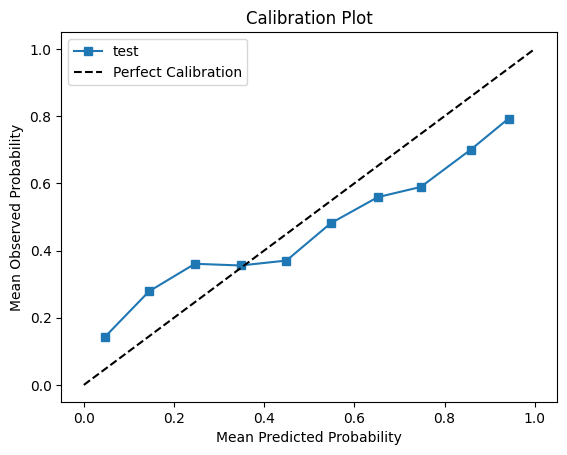

In [62]:
calibration_plot(final_test_improved["archetype_0"],"test")

In [73]:
evaluate_model(final_test_improved["archetype_2"],"arch_2")

arch_2 Evaluation:
Mean Squared Error: 0.0704
Mean Absolute Error: 0.2047
Pearson Correlation: 0.5947
Spearman Correlation: 0.5760
Standard deviation: 0.2653


(np.float64(0.07043298085803781),
 np.float64(0.20468277286075282),
 np.float64(0.5946859528968997),
 np.float64(0.5759652054550081),
 np.float64(0.26532794144164434))

0 rows were removed


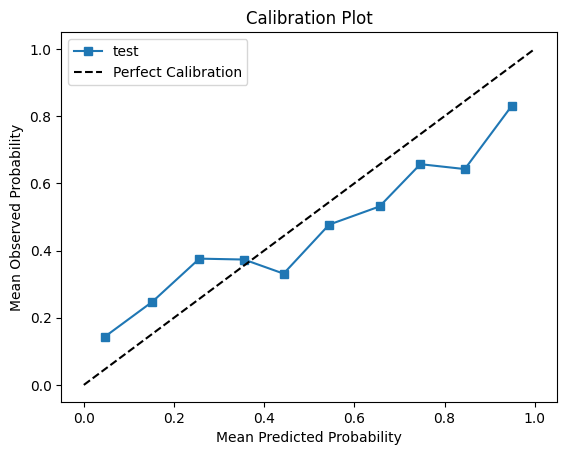

In [72]:
calibration_plot(final_test_improved["archetype_2"],"test")

In [63]:
trips_logit[(trips_logit["destination"]=="ES300")&(trips_logit["origin"]=="ES511")]

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
1301,ES511,ES300,"['007171801', '007160000']",7098.778,4815.351893,318.515538,453.898785,493.409581,415.609147,582.541057,1.0,41.0,18.0,163.464286,52.960000,14.56000,NaN,NaN,NaN,NaN,222.464286,52.960000,14.56000,1,9066.654,6160.964201,0.781591,404.917038,0.786619,572.072183,0.793429,629.936123,0.783269,529.978837,0.784200,746.494618,0.780369
1302,ES511,ES300,"['LEBL', 'LEMD']",1921.272,1315.669159,84.506455,115.946944,131.916042,110.851689,159.542711,1.0,123.0,63.0,85.625000,142.763062,43.55375,NaN,NaN,NaN,NaN,271.625000,142.763062,43.55375,2,9066.654,6160.964201,0.213549,404.917038,0.208701,572.072183,0.202679,629.936123,0.209412,529.978837,0.209162,746.494618,0.213723
1300,ES511,ES300,"['007171801', '007117000']",46.604,29.943150,1.895045,2.226455,4.610499,3.518001,4.410850,1.0,41.0,28.0,546.000000,52.710000,14.49000,NaN,NaN,NaN,NaN,615.000000,52.710000,14.49000,3,9066.654,6160.964201,0.004860,404.917038,0.004680,572.072183,0.003892,629.936123,0.007319,529.978837,0.006638,746.494618,0.005909


In [64]:
trips_logit_improved

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
0,ES111,ES113,"['007131400', '007122100']",831.820,638.068954,17.071497,16.351680,68.127097,37.168519,55.032253,1.0,61.0,28.0,42.733333,7.400000,2.320000,NaN,NaN,NaN,NaN,131.733333,7.400000,2.320000,1,1135.259,870.341315,0.733125,23.841565,0.716039,22.017641,0.742663,91.745092,0.742569,51.394958,0.723194,75.918430,0.724887
1,ES111,ES113,"['007131412', '007122100']",298.436,228.508198,6.682714,5.530960,23.093871,14.035849,20.584408,1.0,43.0,28.0,78.571429,11.090000,3.470000,NaN,NaN,NaN,NaN,149.571429,11.090000,3.470000,2,1135.259,870.341315,0.262550,23.841565,0.280297,22.017641,0.251206,91.745092,0.251718,51.394958,0.273098,75.918430,0.271138
2,ES111,ES113,"['007131412', '007120300']",5.003,3.764162,0.087354,0.135002,0.524124,0.190590,0.301768,1.0,43.0,69.0,179.500000,10.890000,3.410000,NaN,NaN,NaN,NaN,291.500000,10.890000,3.410000,3,1135.259,870.341315,0.004325,23.841565,0.003664,22.017641,0.006132,91.745092,0.005713,51.394958,0.003708,75.918430,0.003975
3,ES111,ES114,"['007131412', '007123004']",470.356,331.036817,15.922206,12.295786,51.267123,22.336955,37.497113,1.0,43.0,31.0,77.266667,9.740000,3.050000,NaN,NaN,NaN,NaN,151.266667,9.740000,3.050000,1,742.468,524.662658,0.630952,24.544201,0.648716,19.613536,0.626903,78.447439,0.653522,36.069526,0.619275,59.130640,0.634140
4,ES111,ES114,"['007131400', '007123004']",250.284,178.501300,7.842317,6.669803,24.916093,12.508677,19.845810,1.0,61.0,31.0,46.947368,4.670000,1.460000,NaN,NaN,NaN,NaN,138.947368,4.670000,1.460000,2,742.468,524.662658,0.340221,24.544201,0.319518,19.613536,0.340061,78.447439,0.317615,36.069526,0.346793,59.130640,0.335626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,ES709,ES704,"['GCXO', 'GCFV']",531.568,305.276746,17.937275,13.349504,111.117648,36.998595,46.888231,1.0,120.0,83.0,50.000000,114.305727,48.438182,NaN,NaN,NaN,NaN,253.000000,114.305727,48.438182,1,563.746,321.740812,0.948828,18.837866,0.952193,13.888330,0.961203,119.600975,0.929070,39.811361,0.929348,49.866657,0.940272
1605,ES709,ES704,"['GCXO', 'GCLP', 'GCFV']",18.237,9.893131,0.368492,0.298173,4.372704,1.561184,1.743317,1.0,120.0,83.0,30.000000,88.163786,43.358571,25.0,40.0,99.514129,43.560857,298.000000,187.677914,86.919429,2,563.746,321.740812,0.030749,18.837866,0.019561,13.888330,0.021469,119.600975,0.036561,39.811361,0.039215,49.866657,0.034960
1606,ES709,ES704,"['GCTS', 'GCLP', 'GCFV']",13.941,6.570935,0.532100,0.240652,4.110623,1.251582,1.235108,1.0,164.0,83.0,35.000000,89.585500,44.370000,25.0,40.0,99.502750,43.485000,347.000000,189.088250,87.855000,3,563.746,321.740812,0.020423,18.837866,0.028246,13.888330,0.017328,119.600975,0.034369,39.811361,0.031438,49.866657,0.024768
1607,ES709,ES705,"['GCXO', 'GCLP']",912.658,512.407806,47.564359,25.943132,183.627066,64.197656,78.917981,1.0,120.0,57.0,30.000000,88.205638,43.637586,NaN,NaN,NaN,NaN,207.000000,88.205638,43.637586,1,1061.873,595.863255,0.859942,51.978027,0.915086,30.264539,0.857212,215.094428,0.853704,75.652971,0.848581,93.019780,0.848400


In [65]:
filtered_df = trips_logit_improved[trips_logit_improved['path'].str.contains(r'(?=.*[a-zA-Z])(?=.*[0-9])', regex=True, na=False)]

In [67]:
filtered_df["trips"].sum()

np.float64(113.25000000000001)

In [68]:
trips_logit_improved["trips"].sum()

np.float64(196117.14299999998)

In [69]:
filtered_df["trips"].sum()/trips_logit_improved["trips"].sum()*100

np.float64(0.05774609922805169)